In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
VALID_DATASET_NAMES = [
    'Tiny Imagenet',
    'CIFAR-10',
]

# First level dictionary keys should be the name of the method.  Each method
# name should map to a second level dictionary.  The second level dictionary's
# keys should be the dataset name, and these keys should map to the `metrics.csv`
# file for the results with that method and on that dataset.  Thus, we create
# a unique mapping between (method, dataset, results_file) triplets.
#
# NOTE 1: Dataset names should either be "Tiny Imagenet" or "CIFAR-10".  If they
# are set to anything else, an error will be thrown.
#
# NOTE 2: Values are set below for demonstration and should be changed.
RESULT_FILE_METHODS_AND_PATHS = {
    'VQ-VAE': {
        'Tiny Imagenet': '/Users/jarrid/repos/ift-6269-vq-vae/results/vqvae_dl_tiny_imagenet_15/metrics.csv'
    },
}

In [3]:
def _check_dataset_name(dataset_name: str):
    if dataset_name not in VALID_DATASET_NAMES:
        raise ValueError(
            'Dataset names must be one of %s or %s, but found %s' % (
                VALID_DATASET_NAMES[0],
                VALID_DATASET_NAMES[1],
                dataset_name
            )
        )

def _load_all_metrics_df() -> pd.DataFrame:
    dfs = []
    
    for method_name, method_dataset_results_dict in RESULT_FILE_METHODS_AND_PATHS.items():
        for dataset_name, results_path in method_dataset_results_dict.items():
            _check_dataset_name(dataset_name)
            
            df = pd.read_csv(results_path)
            df['Method'] = method_name
            df['Dataset'] = dataset_name
            
            dfs.append(df)
            
    return pd.concat(dfs)
        
def plot(
    metric_name: str,
    method_name: str=None, 
    dataset_name: str=None, 
    x_axis_metric: str='step',
    sns_plot_fxn_name: str='lineplot',
    hue_column: str=None,
    title: str=None,
    x_label: str=None,
    y_label: str=None,
    **kwargs
) -> None:
    """Plots your results!
    
    Args:
        metric_name: str -- Name of the metric you'd like to plot
        method_name: str -- Optionally set to the method you'd like to plot for.
                            If it is set, then the plot will only include results
                            for that method.  If not set, the method plots results 
                            for all methods.
                            
        dataset_name: str -- Similar to method_name, optionally sets the dataset you'd
                             like to plot for.  This can be used in conjunction with
                             method_name.
                             
        x_axis_metric: str -- The metric that should go on the X-axis.
        sns_plot_fxn_name: str -- This method uses seaborn for plotting.  This argument
                                  tells the method which seaborn method to use to plot.
                                  Default behavior is lineplot, but can be set to the name
                                  of any of the plots here: https://seaborn.pydata.org/api.html.
                                  
        hue_column: str -- The name of the column in the result sets to use as the hue 
                           parameter for seaborn (see seaborn docs for details on the
                           hue parameter).  Set to None by default.
        
        title: str -- Optionally set the title for the plot.
        x_label: str -- Optionally set the X-axis label for the plot.
        y_label: str -- Optionally set the Y-axis label for the plot.
        **kwargs -- Extra arguments to be passed to the seaborn plotting function.
                    See seaborn docs for details on using **kwargs with their
                    plotting methods (e.g., on 
                    https://seaborn.pydata.org/generated/seaborn.scatterplot.html).
    
    Returns:
        Nada, nothing, zip
    """
    all_df = _load_all_metrics_df()
    
    if method_name is not None:
        all_df = all_df[all_df['Method'] == method_name]
        
    if dataset_name is not None:
        all_df = all_df[all_df['Dataset'] == dataset_name]
        
    plot_fxn = getattr(sns, sns_plot_fxn_name)
    ax = plot_fxn(
        data=all_df, 
        x=x_axis_metric, 
        y=metric_name, 
        hue=hue_column, 
        **kwargs
    )
    
    if title:
        ax.set_title(title)
    
    if x_label:
        ax.set_xlabel(x_label)
        
    if y_label:
        ax.set_ylabel(y_label)

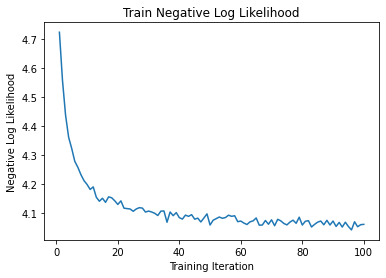

In [4]:
plot(
    'train/nll_lb_epoch', 
    title='Train Negative Log Likelihood', 
    x_label='Training Iteration',
    y_label='Negative Log Likelihood'
)